In [15]:
import pandas as pd
from problem_formulation import get_model_for_problem_formulation
from ema_workbench.analysis import plotting, plotting_util, pairs_plotting, prim
from ema_workbench import (RealParameter, ScalarOutcome, Constant,
                           Model, MultiprocessingEvaluator, SequentialEvaluator, ema_logging,
                           perform_experiments, Policy, Scenario)
from ema_workbench.em_framework.salib_samplers import get_SALib_problem
from ema_workbench.em_framework.samplers import sample_uncertainties
from ema_workbench.em_framework.optimization import (HyperVolume,
                                                     EpsilonProgress)
from ema_workbench import Constraint
from ema_workbench.util.utilities import (save_results, load_results)
import seaborn as sns
import matplotlib.pyplot as plt

In [16]:
# load results from scenario discovery
experiment, result = load_results('ANALYSIS_results/01_model_run.tar.gz')

In [17]:
# set up PRIM

# uncertainties
x_prim = experiment[['discount rate 0', 'discount rate 1', 'discount rate 2', 'A.0_ID flood wave shape', 'A.1_Bmax', 'A.1_pfail', 'A.1_Brate', 'A.2_Bmax', 'A.2_pfail', 'A.2_Brate', 'A.3_Bmax', 'A.3_pfail', 'A.3_Brate', 'A.4_Bmax', 'A.4_pfail', 'A.4_Brate', 'A.5_Bmax', 'A.5_pfail', 'A.5_Brate']]

# outcomes of interest -> bad outcomes
y_prim = (result['Expected Number of Deaths'] > 0) | (result['Minimum water level full network'] < 4)

In [18]:
# run PRIM
prim_alg = prim.Prim(x_prim, y_prim, threshold=0.8)
box1 = prim_alg.find_box()

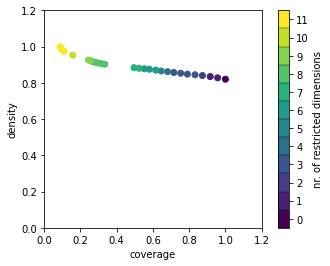

In [19]:
# show tradeoff
box1.show_tradeoff()
plt.show()

coverage    0.552195
density     0.877519
id                12
mass           0.516
mean        0.877519
res_dim            6
Name: 12, dtype: object

                            box 12                                          
                               min         max                     qp values
A.5_pfail                 0.002902    0.805371  [-1.0, 0.013985979850527517]
A.4_Bmax                 30.422028  319.725598    [-1.0, 0.2598681422417082]
A.4_pfail                 0.003245    0.886321    [-1.0, 0.2598681422417082]
A.3_Bmax                 30.634330  331.895361      [-1.0, 0.31099834198062]
A.5_Bmax                 30.919420  333.994952   [-1.0, 0.33909036861731745]
A.0_ID flood wave shape  14.500000  132.000000   [0.23793295460437142, -1.0]



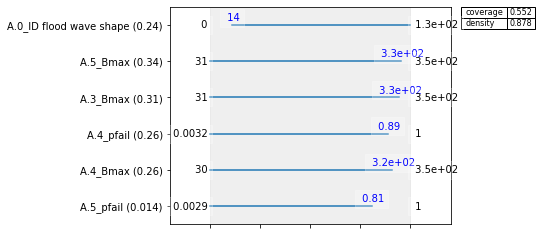

In [20]:
# inspect box
box1.inspect(12)
box1.inspect(12, style='graph')
plt.show()

In [21]:
# select box with making trade-off
box1.select(12)

In [22]:
# get scenarios and outcomes with selected box
scenarios = x_prim.iloc[box1.yi]
outcome = {k:v[box1.yi] for k,v in result.items()}

In [29]:
# save scenarios
scenarios_dict = scenarios.to_dict(orient = 'records')
scenarios_w = []

for s in range(len(scenarios_dict)):
    scenarios_w.append(Scenario(str(s), **scenarios_dict[s]))


In [31]:
import pickle

with open('ANALYSIS_results/02_PRIM_scenarios.txt', 'wb') as file:
    pickle.dump(scenarios_w, file)